Loading Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')

TASK 1: Data exploration

In [ ]:
# what is is type of the output?
print("data type: ", type(titanic))
# what is the few first rows?
print("first rows: ", titanic.head())
# what are the columns?
print("columns: ", titanic.columns)
# what are the general info
print("general info:", titanic.info())
# show a few general statistics
print("base statistics:", titanic.describe())

In [ ]:
# split data columns in halves for better terminal display
print(len(titanic.columns))
col_range_1 = titanic.columns[0:7]
col_range_2 = titanic.columns[8:14]
data_range_1 = titanic[col_range_1]
data_range_2 = titanic[col_range_2]
print("First half of the data")
print(data_range_1)
print("Second half of the data")
print(data_range_2)

15
First half of the data
     survived  pclass     sex   age  sibsp  parch     fare
0           0       3    male  22.0      1      0   7.2500
1           1       1  female  38.0      1      0  71.2833
2           1       3  female  26.0      0      0   7.9250
3           1       1  female  35.0      1      0  53.1000
4           0       3    male  35.0      0      0   8.0500
..        ...     ...     ...   ...    ...    ...      ...
886         0       2    male  27.0      0      0  13.0000
887         1       1  female  19.0      0      0  30.0000
888         0       3  female   NaN      1      2  23.4500
889         1       1    male  26.0      0      0  30.0000
890         0       3    male  32.0      0      0   7.7500

[891 rows x 7 columns]
Second half of the data
      class    who  adult_male deck  embark_town alive
0     Third    man        True  NaN  Southampton    no
1     First  woman       False    C    Cherbourg   yes
2     Third  woman       False  NaN  Southampton   ye

Task 2: Number of survivors base on gender

<function matplotlib.pyplot.show(close=None, block=None)>

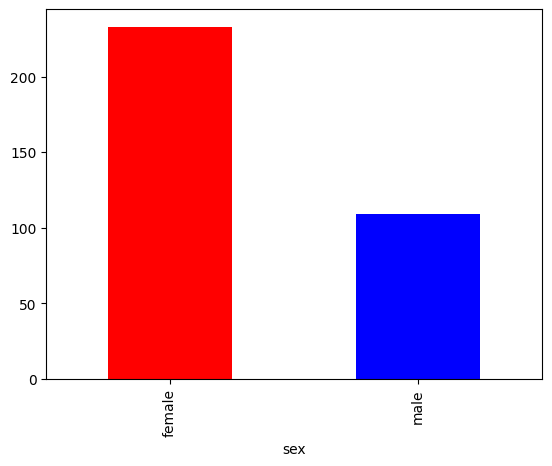

In [13]:
survivors_by_gender =  titanic.groupby('sex')['survived'].sum()

survivors_by_gender.plot(kind='bar', color=['red', 'blue'])
plt.show

Task 3: Age distribution per class

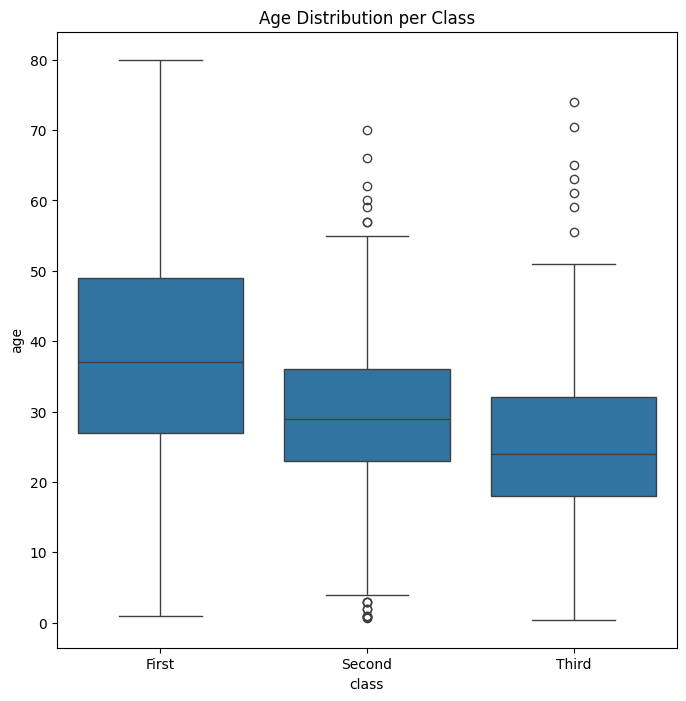

In [ ]:
# box plot
plt.figure(figsize=(8,8))
sns.boxplot(x='class', y='age', data=titanic)
plt.title('Age Distribution per Class')
plt.show()

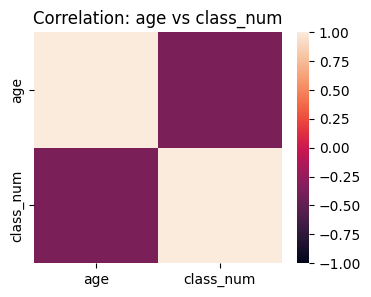

In [42]:
# heat map
# map categorical data to number values

titanic['class_num'] = titanic['class'].map({'First': 1, 'Second': 2, 'Third': 3})

df = titanic[['age', 'class_num']].dropna(how='any')

corr_matrix =df.corr(method='pearson')

plt.figure(figsize=(4,3))
sns.heatmap(corr_matrix, vmin=-1, vmax=1)
plt.title('Correlation: age vs class_num')
plt.show()



Task 4: Data Visualization for 4 small questions

4.1: How did survival rate differ between disembarkation points?

survival rate by town:
Cherbourg: 55.36 %
Queenstown: 38.96 %
Southampton: 33.70 %


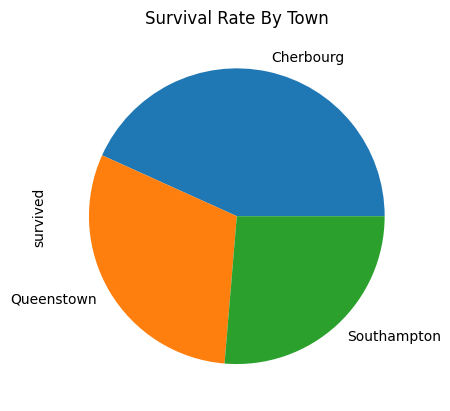

In [39]:
survivors_by_embark = titanic.groupby('embark_town')['survived'].mean()

print("survival rate by town:")
for town, survival_rate in survivors_by_embark.items():
    print(f"{town}: {survival_rate * 100 :.2f} %")

survivors_by_embark.plot(kind='pie')
plt.title('Survival Rate By Town')
plt.show()

4.2: Distribution of fare price for those survived and those did not

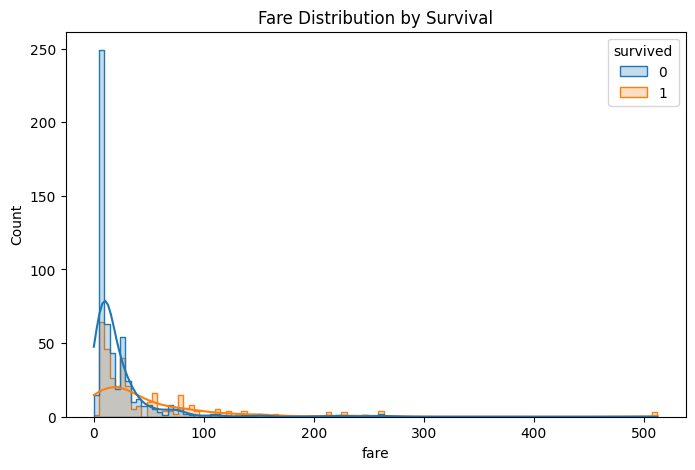

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(data=titanic, x='fare', hue='survived', kde=True, element='step')
plt.title('Fare Distribution by Survival')
plt.show()

4.3: Is age a factor in the survival of men and women?

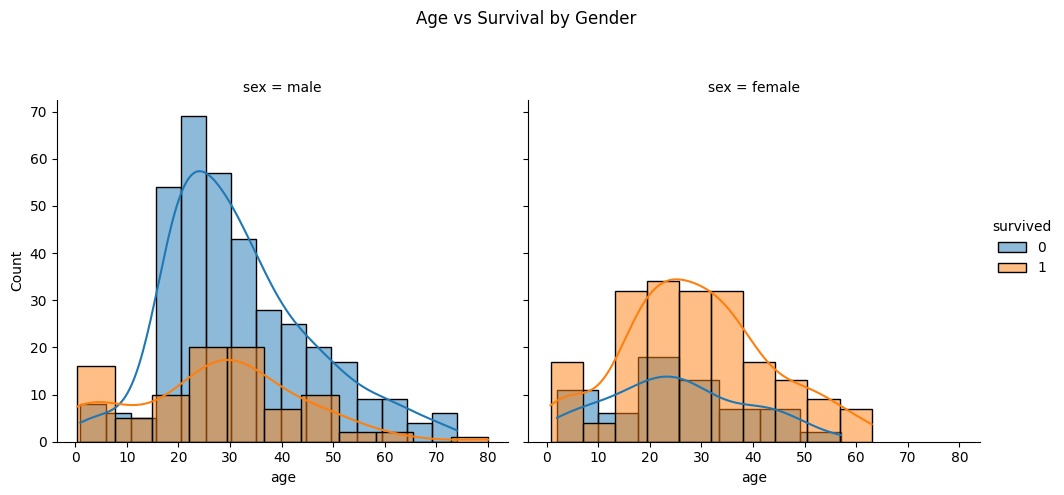

In [38]:
sns.FacetGrid(titanic, col='sex', hue='survived', height=5).map(sns.histplot, 'age', kde=True).add_legend()
plt.subplots_adjust(top=0.8)
plt.suptitle('Age vs Survival by Gender')
plt.show()


4.4: How did the number of siblings/spouses aboard relate to survival?

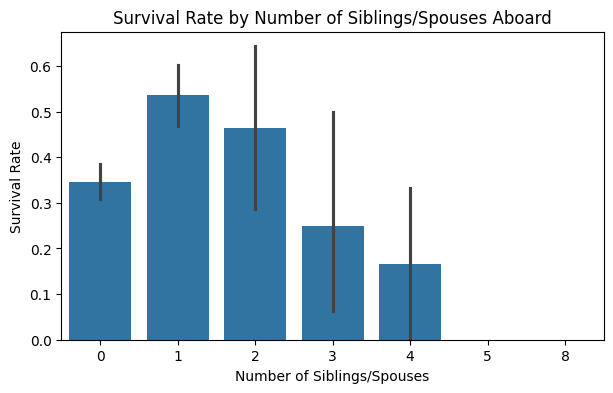

In [43]:
plt.figure(figsize=(7,4))
sns.barplot(x='sibsp', y='survived', data=titanic)
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')
plt.show()